<a href="https://colab.research.google.com/github/Radhika02-rjn/Radhika02-rjn/blob/main/Bike_sales_forcaasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 Sales
Date                  
2022-01-01   96.000000
2022-01-02  176.294468
2022-01-03  164.588068
2022-01-04  112.879933
2022-01-05   61.169197


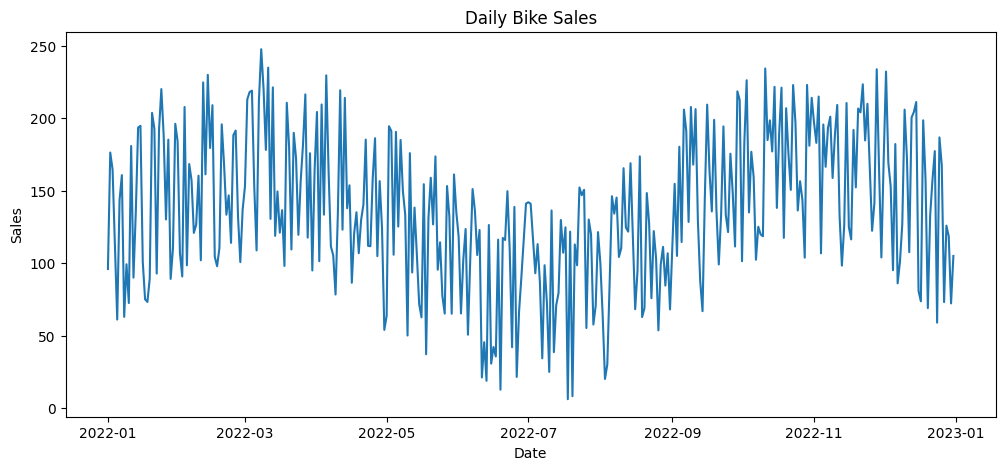

ARIMA - MAE: 38.84, RMSE: 47.28
XGBoost - MAE: 41.78, RMSE: 51.55


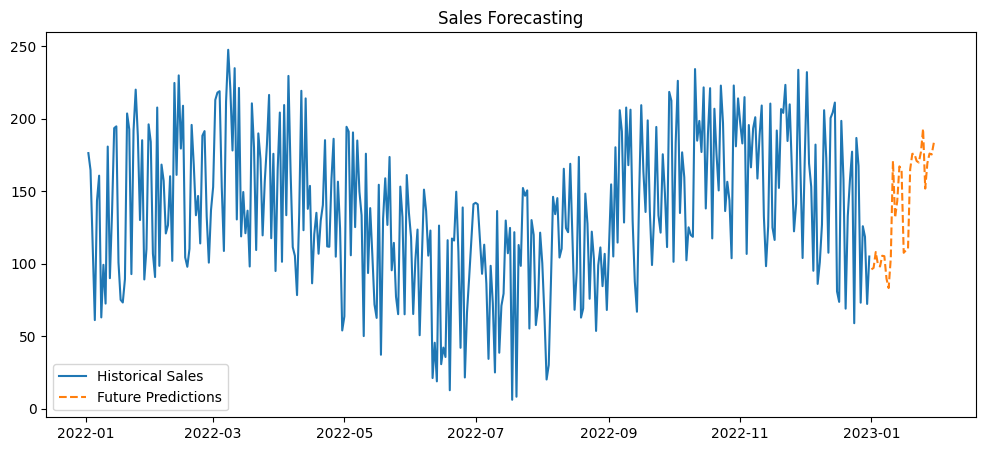

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load Dataset (Simulated Dataset)
dates = pd.date_range(start='2022-01-01', periods=365, freq='D')
sales = np.random.randint(50, 200, size=(365,)) + np.sin(np.linspace(0, 3*np.pi, 365))*50

data = pd.DataFrame({'Date': dates, 'Sales': sales})
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print(data.head())

# Step 2: Exploratory Data Analysis
plt.figure(figsize=(12,5))
sns.lineplot(x=data.index, y=data['Sales'])
plt.title('Daily Bike Sales')
plt.show()

# Step 3: Feature Engineering
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year
data['Lag_1'] = data['Sales'].shift(1)
data.dropna(inplace=True)

# Step 4: Train/Test Split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Step 5: ARIMA Model
arima_model = ARIMA(train['Sales'], order=(5,1,0))
arima_result = arima_model.fit()
forecast_arima = arima_result.forecast(steps=len(test))

# Step 6: XGBoost Model
X = data[['Day', 'Month', 'Year', 'Lag_1']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Step 7: Evaluation
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}')

evaluate(test['Sales'], forecast_arima, 'ARIMA')
evaluate(y_test, xgb_pred, 'XGBoost')

# Step 8: Future Forecasting
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame({'Day': future_dates.day, 'Month': future_dates.month, 'Year': future_dates.year})
future_df['Lag_1'] = data['Sales'].iloc[-1]
future_predictions = xgb_model.predict(future_df)

# Plot Forecasts
plt.figure(figsize=(12,5))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='dashed')
plt.legend()
plt.title('Sales Forecasting')
plt.show()


            Sales
date             
2024-03-01  396.3
2024-03-02  228.1
2024-03-03  349.1
2024-03-04  135.2
2024-03-05  338.5


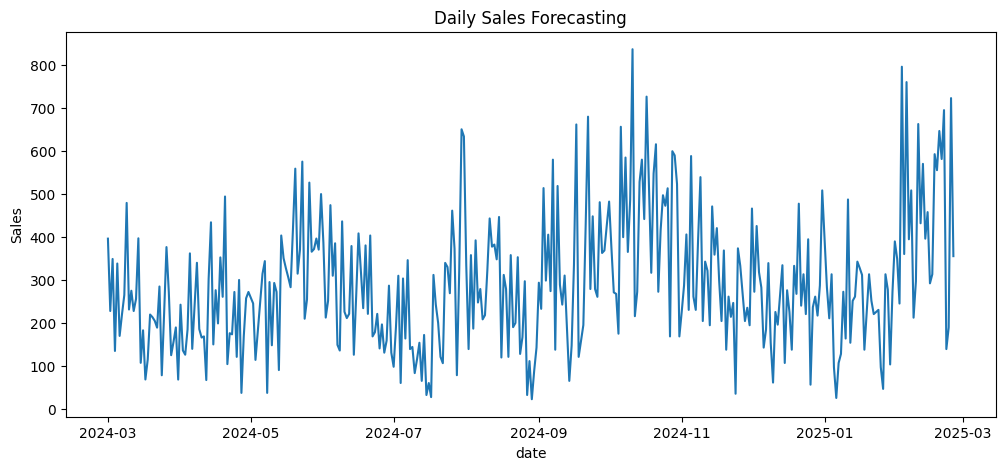

Linear Regression - MAE: 137.73, RMSE: 189.37


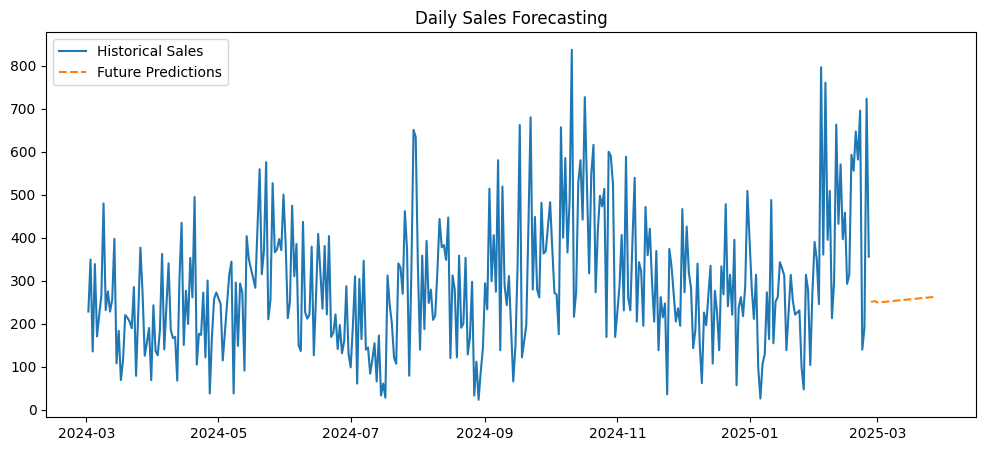

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
data = pd.read_csv("/content/index_1.csv")

# Convert 'date' to DateTime format
data['date'] = pd.to_datetime(data['date'])

# Aggregate daily sales
data = data.groupby('date').agg({'money': 'sum'}).rename(columns={'money': 'Sales'})
data = data.asfreq('D')  # Ensure daily frequency

data.dropna(inplace=True)
print(data.head())

# Exploratory Data Analysis
plt.figure(figsize=(12,5))
sns.lineplot(x=data.index, y=data['Sales'])
plt.title('Daily Sales Forecasting')
plt.show()

# Feature Engineering
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year
data['Lag_1'] = data['Sales'].shift(1)
data.dropna(inplace=True)

# Train/Test Split
X = data[['Day', 'Month', 'Year', 'Lag_1']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Evaluation
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}')

evaluate(y_test, lr_pred, 'Linear Regression')

# Future Forecasting
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame({'Day': future_dates.day, 'Month': future_dates.month, 'Year': future_dates.year})
future_df['Lag_1'] = data['Sales'].iloc[-1]
future_predictions = lr_model.predict(future_df)

# Plot Forecasts
plt.figure(figsize=(12,5))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='dashed')
plt.legend()
plt.title('Daily Sales Forecasting')
plt.show()
